Langkah-langkah pembuatan kodingan Fuzzy

# Import Library

Library yang digunakan antara lain:
*   pandas
*   matplotlib.pyplot





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Panggil Dataset

Dataset yang digunakan adalah dataset penghasilan dan pengeluaran dari orangtua mahasiswa, kalian diminta untuk melakukan penyaringan untuk mendapatkan mahasiswa yang layak untuk diberikan bantuan beasiswa

dataset ada pada link ini: https://drive.google.com/file/d/1OqZPEN2m_igflKLzO7w4EFb9717b_jj9/view?usp=sharing

code untuk mendownload dataset: 
`!gdown --id 1OqZPEN2m_igflKLzO7w4EFb9717b_jj9`

salah satu cara untuk membaca file excel: 
`df = pd.read_excel('nama_file.xlsx')`



In [ ]:
!gdown --id 1OqZPEN2m_igflKLzO7w4EFb9717b_jj9

data = pd.read_excel('Mahasiswa.xls')

data.sample(5)

Downloading...
From: https://drive.google.com/uc?id=1OqZPEN2m_igflKLzO7w4EFb9717b_jj9
To: /content/Mahasiswa.xls
100% 32.3k/32.3k [00:00<00:00, 27.6MB/s]


,Id,Penghasilan,Pengeluaran
43,44,17.37,9.68
82,83,17.88,10.64
37,38,9.94,10.82
98,99,9.83,10.64
55,56,13.81,9.25


# Fuzzification

Pada tugas ini buatlah fungsi fuzzification dengan 3 keanggotaan dengan fungsi trapesium. Keanggotaannya yaitu sedikit, sedang, dan banyak


Batas2 yang digunakan yaitu:


## Penghasilan
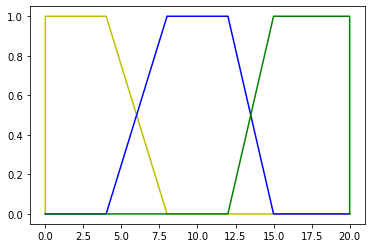
1.   Sedikit `a=0 b=0 c=4 d=8`
2.   Sedang  `a=4 b=8 c=12 d=15`
1.   Banyak `a=12 b=15 c=nilai max d=nilai max`




In [ ]:
def fuzzy_penghasilan(x):
    penghasilan = {'sedikit': 0, 'sedang': 0, 'banyak': 0}

    a, b, c, d, e = 3, 6, 9, 12, 20

    # Garis Datar
    if x <= a:
        penghasilan['sedikit'] = 1
    if b <= x <= c:
        penghasilan['sedang'] = 1
    if d <= x <= e:
        penghasilan['banyak'] = 1
    
    # Garis Miring (Gradient)
    if a < x <= b:
        penghasilan['sedikit'] = -(x - b) / (b - a)
    if a < x < b:
        penghasilan['sedang'] = (x - a) / (b - a)
    if c < x <= d:
        penghasilan['sedang'] = -(x - d) / (d - c)
    if c < x < d:
        penghasilan['banyak'] = (x - c) / (d - c)
        
    return penghasilan

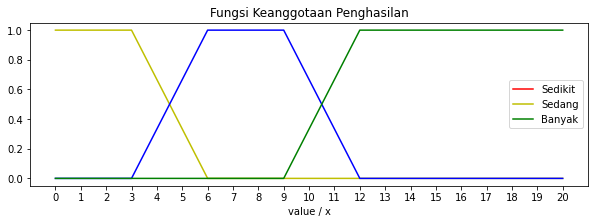

In [ ]:
plt.figure(figsize=(10, 3))
plt.title("Fungsi Keanggotaan Penghasilan")

plt.plot(range(21), [fuzzy_penghasilan(x)['sedikit'] for x in range(21)], 'y')
plt.plot(range(21), [fuzzy_penghasilan(x)['sedang'] for x in range(21)], 'b')
plt.plot(range(21), [fuzzy_penghasilan(x)['banyak'] for x in range(21)], 'g')

plt.plot(0, 0, 'r', linewidth=1.5, label='Sedikit')
plt.plot(0, 0, 'y', linewidth=1.5, label='Sedang')
plt.plot(0, 0, 'g', linewidth=1.5, label='Banyak')

plt.xticks(list(range(21)))
plt.xlabel("value / x")
plt.legend()
plt.show()

## Pengeluaran
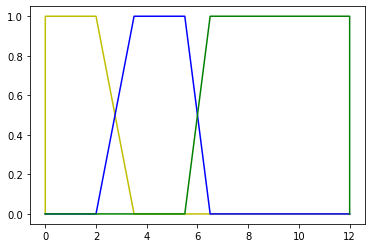
1.   Sedikit `a=0 b=0 c=2 d=3.5`
2.   Sedang  `a=2 b=3.5 c=5.5 d=6.5`
1.   Banyak `a=5.5 b=6.5 c=nilai max d=nilai max`




In [ ]:
def fuzzy_pengeluaran(x):
    pengeluaran = {'sedikit': 0, 'sedang': 0, 'banyak': 0}

    a, b, c, d, e = 2, 4, 6, 8, 12

    # Garis Datar
    if x <= a:
        pengeluaran['sedikit'] = 1
    if b <= x <= c:
        pengeluaran['sedang'] = 1
    if d <= x <= e:
        pengeluaran['banyak'] = 1
    
    # Garis Miring (Gradient)
    if a < x <= b:
        pengeluaran['sedikit'] = -(x - b) / (b - a)
    if a < x < b:
        pengeluaran['sedang'] = (x - a) / (b - a)
    if c < x <= d:
        pengeluaran['sedang'] = -(x - d) / (d - c)
    if c < x < d:
        pengeluaran['banyak'] = (x - c) / (d - c)
        
    return pengeluaran

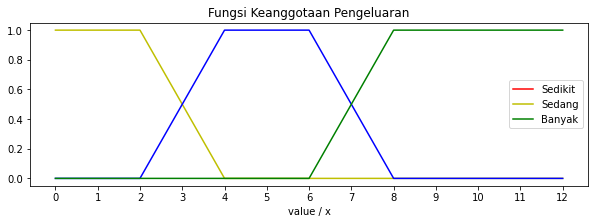

In [ ]:
plt.figure(figsize=(10, 3))
plt.title("Fungsi Keanggotaan Pengeluaran")

plt.plot(range(13), [fuzzy_pengeluaran(x)['sedikit'] for x in range(13)], 'y')
plt.plot(range(13), [fuzzy_pengeluaran(x)['sedang'] for x in range(13)], 'b')
plt.plot(range(13), [fuzzy_pengeluaran(x)['banyak'] for x in range(13)], 'g')

plt.plot(0, 0, 'r', linewidth=1.5, label='Sedikit')
plt.plot(0, 0, 'y', linewidth=1.5, label='Sedang')
plt.plot(0, 0, 'g', linewidth=1.5, label='Banyak')

plt.xticks(list(range(13)))
plt.xlabel("value / x")
plt.legend()
plt.show()

In [ ]:
fuzzify = []

for penghasilan, pengeluaran in zip(data['Penghasilan'], data['Pengeluaran']):
    fuzzy = {'Penghasilan': 0, 'Pengeluaran': 0}

    fuzzy['Penghasilan'] = fuzzy_penghasilan(penghasilan)
    fuzzy['Pengeluaran'] = fuzzy_pengeluaran(pengeluaran)

    fuzzify.append(fuzzy)

print("Contoh Hasil Fuzzifikasi :\n")
for i in range(0, 20, 2):
    print("Penghasilan   :", fuzzify[i]['Penghasilan'])
    print("Pengeluaran   :", fuzzify[i]['Pengeluaran'], end="\n\n")

Contoh Hasil Fuzzifikasi :

Penghasilan   : {'sedikit': 0, 'sedang': 0, 'banyak': 1}
Pengeluaran   : {'sedikit': 0, 'sedang': 0, 'banyak': 1}

Penghasilan   : {'sedikit': 0, 'sedang': 0, 'banyak': 1}
Pengeluaran   : {'sedikit': 0, 'sedang': 0, 'banyak': 1}

Penghasilan   : {'sedikit': 0, 'sedang': 0, 'banyak': 1}
Pengeluaran   : {'sedikit': 0, 'sedang': 0.5049999999999999, 'banyak': 0.4950000000000001}

Penghasilan   : {'sedikit': 0, 'sedang': 0.9900000000000002, 'banyak': 0.009999999999999787}
Pengeluaran   : {'sedikit': 0, 'sedang': 0, 'banyak': 1}

Penghasilan   : {'sedikit': 0, 'sedang': 0, 'banyak': 1}
Pengeluaran   : {'sedikit': 0, 'sedang': 0, 'banyak': 1}

Penghasilan   : {'sedikit': 0.07333333333333325, 'sedang': 0.9266666666666667, 'banyak': 0}
Pengeluaran   : {'sedikit': 0, 'sedang': 0.6699999999999999, 'banyak': 0.33000000000000007}

Penghasilan   : {'sedikit': 0.15000000000000005, 'sedang': 0.85, 'banyak': 0}
Pengeluaran   : {'sedikit': 0, 'sedang': 0.8250000000000002, 'ba

# Inference

Pada fungsi inference ini akan menghasilkan nilai inference yang akan dibagi menjadi 3 keanggotaan yaitu ditolak, dipertimbangkan, dan diterima

<center> Inference Rule </center>

| Penghasilan \ Pengeluaran  | Sedikit         | Sedang          | Banyak          |   |
|-------------------------------|-----------------|-----------------|-----------------|---|
| Sedikit                       | dipertimbangkan | diterima        | diterima        |   |
| Sedang                        | ditolak         | dipertimbangkan | diterima        |   |
| Banyak                        | ditolak         | ditolak         | dipertimbangkan |   |


In [ ]:
fuzzy_set_rules = {
    ('sedikit', 'sedikit') : 'dipertimbangkan',
    ('sedikit', 'sedang') : 'diterima',
    ('sedikit', 'banyak') : 'diterima',
    ('sedang', 'sedikit') : 'ditolak',
    ('sedang', 'sedang') : 'dipertimbangkan',
    ('sedang', 'banyak') : 'diterima',
    ('banyak', 'sedikit') : 'ditolak',
    ('banyak', 'sedang') : 'ditolak',
    ('banyak', 'banyak') : 'dipertimbangkan',
}

In [ ]:
inference_result = []

def inference(fuzzed):
    result = {'ditolak': 0, "dipertimbangkan": 0, "diterima": 0}

    for Penghasilan in fuzzed['Penghasilan'].keys():
        for Pengeluaran in fuzzed['Pengeluaran'].keys():
            min_value = min(fuzzed['Pengeluaran'][Pengeluaran], fuzzed['Penghasilan'][Penghasilan])

            # Proses Conjunction Sesuai Fuzzy Rules pada variabel fuzzy_set_rules
            output = fuzzy_set_rules[(Penghasilan, Pengeluaran)]

            if min_value > result[output]:
               result[output] = min_value

    return result

In [ ]:
for fuzzed in fuzzify:
    inference_result.append(inference(fuzzed))

print("Contoh Hasil Inferensi :\n")
for i in range(0, 20, 2):
    print(inference_result[i])

Contoh Hasil Inferensi :

{'ditolak': 0, 'dipertimbangkan': 1, 'diterima': 0}
{'ditolak': 0, 'dipertimbangkan': 1, 'diterima': 0}
{'ditolak': 0.5049999999999999, 'dipertimbangkan': 0.4950000000000001, 'diterima': 0}
{'ditolak': 0, 'dipertimbangkan': 0.009999999999999787, 'diterima': 0.9900000000000002}
{'ditolak': 0, 'dipertimbangkan': 1, 'diterima': 0}
{'ditolak': 0, 'dipertimbangkan': 0.6699999999999999, 'diterima': 0.33000000000000007}
{'ditolak': 0, 'dipertimbangkan': 0.8250000000000002, 'diterima': 0.17499999999999982}
{'ditolak': 0, 'dipertimbangkan': 1, 'diterima': 0}
{'ditolak': 0, 'dipertimbangkan': 1, 'diterima': 0}
{'ditolak': 0.3200000000000003, 'dipertimbangkan': 0.6799999999999997, 'diterima': 0}


# Deffuzification

Menggunakan sugeno model untuk fungsi deffuzzifikasi dengan nilai seperti berikut

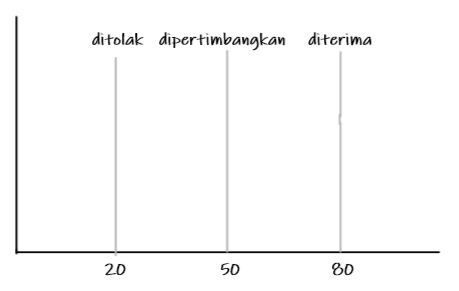

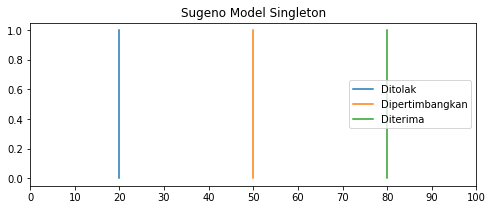

In [ ]:
plt.figure(figsize=(8, 3))
plt.title("Sugeno Model Singleton")

plt.plot([20,20], [0, 1], label="Ditolak")
plt.plot([50,50], [0, 1], label="Dipertimbangkan")
plt.plot([80,80], [0, 1], label="Diterima")
plt.xticks(np.arange(0, 110, 10.0))
plt.legend()
plt.show()

In [ ]:
deffuzy = {'ditolak': 20, "dipertimbangkan": 50, "diterima": 80}

def defuzzification(inference, deffuzy):
    numerator, denominator = 0, 0
    
    for output in deffuzy.keys():
        numerator += inference[output] * deffuzy[output]
        denominator += inference[output]
        
    return numerator/denominator

final = []

for inference in inference_result:
    final.append(defuzzification(inference, deffuzy)) 

In [ ]:
print("Contoh Hasil Defuzifikasi:\n")
for i in range(0, 50, 5):
    print(f'Data Ke-{i+1} = {final[i]}')   

Contoh Hasil Defuzifikasi:

Data Ke-1 = 50.0
Data Ke-6 = 38.0
Data Ke-11 = 59.900000000000006
Data Ke-16 = 50.0
Data Ke-21 = 50.0
Data Ke-26 = 50.0
Data Ke-31 = 50.0
Data Ke-36 = 38.0
Data Ke-41 = 63.8
Data Ke-46 = 74.2


# Output
tampilkan 10 mahasiswa teratas yang layak mendapatkan bantuan 

In [ ]:
data['result'] = final
data = data.sort_values(by='result', ascending=False)[:10]
 
data

,Id,Penghasilan,Pengeluaran,result
78,79,8.52,10.32,80.00
3,4,8.23,9.25,80.00
32,33,7.03,10.11,80.00
6,7,9.03,9.35,79.70
93,94,9.07,10.21,79.30
51,52,9.10,9.57,79.00
80,81,9.18,9.46,78.20
24,25,6.48,7.85,77.75
62,63,9.29,9.25,77.10
49,50,9.31,11.29,76.90
